In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression

In [344]:
# 1- i don't need Embarked (it is useless )
#2- there is colleration between : (survived - sex) ,(survived-pclass) , (survived - Cabin) 
#3 - i think i might find something about there relations by using If-tdf on the name 
#4 - i covered some nans by using the relationship between cabin and Fare ( explanation below &&)




# && (when they have the same Fare they will be at the same Cabin section )

In [670]:
training_data=pd.read_csv('Desktop/titanic/train.csv')
testing_data=pd.read_csv('Desktop/titanic/test.csv')
# the testing is same as training but it doesn't have 'Survived' available 

In [671]:
print((pd.isnull(training_data)).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [672]:
# i will delete the one column that have the nan on 'Fare' for the test_data

#print((pd.isnull(testing_data)).sum())

#testing_data=testing_data.dropna(subset=['Fare'])
#testing_data=testing_data.reset_index()
#print((pd.isnull(testing_data)).sum())

# since i won't use the 'Embarked' i don't really need to delete it from the training data 

In [673]:
'''Class_1=(training_data[training_data['Pclass']==1])# there is 80 Cabins & 98 Age / out of 107 for both of them 
if 'G' in Class_1['Cabin'].unique():
    print('G exists')# there is no G ! , there is A,B,C,D,E,F
    # this means there is no one from Pclass=1 living in the G Cabin 
Class_1=Class_1[Class_1['Fare']>0] # dudged the 'noise' (fare = 0)
Class_1.sort_values('Fare')[100:200].head(3)'''
x=1

In [674]:
'''print((testing_data[testing_data['Pclass']==1]).count())
print('--------------')
print((testing_data[testing_data['Pclass']==2]).count())
print('--------------')
print((testing_data[testing_data['Pclass']==3]).count())'''
x=1

In [675]:
#training_data.info() # there is null values at : 'Age' , 'Cabin' , 'Embarked'

#converting male to 1 , female to 0

training_data.loc[training_data['Sex']=='male','Sex']=1
training_data.loc[training_data['Sex']=='female','Sex']=0

testing_data.loc[testing_data['Sex']=='male','Sex']=1
testing_data.loc[testing_data['Sex']=='female','Sex']=0


In [676]:
# deleting the other things to focus on a specific ones 
'''del training_data['PassengerId'],training_data['Embarked']#,training_data['Age']#,training_data['SibSp'],training_data['Parch']
training_data.head()'''
x=1

In [677]:
print(len(training_data['Cabin'].unique()))
# there is 148 different cabins i will turn them into 8 cabins  # A,B,C,D,E,F,G,nan
print(pd.isnull(training_data['Cabin']).sum())
training_data.head()

148
687


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### renamming the Cabin to numbers 

In [678]:
# cleaning data 

#renaming the data 'Cabins' to give it the computing ability   #Cabins :

#1- turning the Cabins to a single level system # and turning them into numbers for the calculations 

for i in range(len(training_data)):
    if pd.notnull(training_data.loc[i,'Cabin']):
        if type(training_data.loc[i,'Cabin'])==str:
            
            if 'A' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=1
            elif 'B' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=2
            elif 'C' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=3
            elif 'D' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=4
            elif 'E' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=5
            elif 'F' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=6
            elif 'G' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=7
    
                 
                
 #2- turning the Cabins on testing_data to a single level system

for i in range(len(testing_data)):
    if pd.notnull(testing_data.loc[i,'Cabin']):
        if type(testing_data.loc[i,'Cabin'])==str:
            

            if 'A' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=1
            elif 'B' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=2
            elif 'C' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=3
            elif 'D' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=4
            elif 'E' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=5
            elif 'F' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=6
            elif 'G' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=7 
#someking of a mistake (someone put a Cabin as T and there is no Cabins called T)
#turning it to nan
#cleaning...
training_data.loc[training_data['Cabin']=='T','Cabin'] = np.nan

#Cabins:                
# 'A' = 1 , 'B'=2 , 'C'=3 , 'D'=4,'E'=5, 'F'=6, 'G'=7
# nan variables on 8

In [679]:
training_data['Cabin'].unique()

array([nan, 3, 5, 7, 4, 1, 2, 6], dtype=object)

In [680]:
print(training_data['Cabin'].unique()) # A,B,C,D,E,F,G,nan converted to 1,2,3,4,5,6,7,8
print(testing_data['Cabin'].unique())


[nan 3 5 7 4 1 2 6]
[nan 2 5 1 3 4 6 7]


In [681]:
print('the training_data nans',pd.isnull(training_data['Cabin']).sum()) # 469
print('the testing_data nans',pd.isnull(testing_data['Cabin']).sum()) # 327

the training_data nans 688
the testing_data nans 327


### fixing the nans on   training_data['Cabin']

In [682]:
#fixing the nans 

# if there is 2 tickets that have the same Fare cost they will get the same Cabin number 
#1- 
for i in range(len(training_data)):
    if training_data.loc[i,'Fare']>0:
    
        if pd.notnull(training_data.loc[i,'Cabin']):
            Fare=training_data.loc[i,'Fare']
            Cabin=training_data.loc[i,'Cabin']
            for a in range(len(training_data)):
                if Fare==training_data.loc[a,'Fare']:
                    training_data.loc[a,'Cabin']=Cabin

  # fixing the 'Cabin' nans on the training_data by using the testing_data
# cleaning data 

for i in range(len(testing_data)):
    if pd.notnull(testing_data.loc[i,'Cabin']):
    
        if testing_data.loc[i,'Fare']>0:
    
        
            Fare=testing_data.loc[i,'Fare']
            Cabin=testing_data.loc[i,'Cabin']
            
            for a in range(len(training_data)):
                
                if Fare==training_data.loc[a,'Fare']:
                    training_data.loc[a,'Cabin']=Cabin
                    

# this thing dropped the nan on the Cabin from 486 to 469

# the nans reduced from 687 to  486 on the training_data                  
                    
print(testing_data['Cabin'].unique())

[nan 2 5 1 3 4 6 7]


In [683]:
training_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          422
Embarked       889
dtype: int64

In [684]:
print('the training_data nans',pd.isnull(training_data['Cabin']).sum()) # 469
print('the testing_data nans',pd.isnull(testing_data['Cabin']).sum()) # 327

the training_data nans 469
the testing_data nans 327


### fixing the testing_data['Cabin'] nans

In [685]:
#fixing the nans  on the testing_data

# if there is 2 tickets that have the same Fare cost they will get the same Cabin number 
#1- 
for i in range(len(testing_data)):
    if testing_data.loc[i,'Fare']>0:
    
        if pd.notnull(testing_data.loc[i,'Cabin']):
            Fare=testing_data.loc[i,'Fare']
            Cabin=testing_data.loc[i,'Cabin']
            for a in range(len(testing_data)):
                if Fare==testing_data.loc[a,'Fare']:
                    testing_data.loc[a,'Cabin']=Cabin

  # fixing the 'Cabin' nans on the training_data by using the testing_data
# cleaning data 

for i in range(len(training_data)):
    if pd.notnull(training_data.loc[i,'Cabin']):
    
        if training_data.loc[i,'Fare']>0:
    
        
            Fare=training_data.loc[i,'Fare']
            Cabin=training_data.loc[i,'Cabin']
            
            for a in range(len(testing_data)):
                
                if Fare==testing_data.loc[a,'Fare']:
                    testing_data.loc[a,'Cabin']=Cabin
                    

# this thing dropped the nan on the Cabin from 486 to 469

# the nans reduced from 687 to  486 on the training_data                  
                    


In [686]:
print('the testing data nans',pd.isnull(testing_data['Cabin']).sum()) # from 688 to 469
print('the training data nans',pd.isnull(training_data['Cabin']).sum()) # from 327 to 218
# reduced the nans on 'Cabin' for the testing_data from 327 to 218

the testing data nans 218
the training data nans 469


In [647]:
# the print should be : the testing data nans 218

### renaming the nans on the 'Cabin' for the training and the testing data 

In [648]:
for i in range(len(training_data)):
    if pd.isnull(training_data.loc[i,'Cabin']):
        training_data.loc[i,'Cabin']=8 
for i in range(len(testing_data)):
    if pd.isnull(testing_data.loc[i,'Cabin']):
        testing_data.loc[i,'Cabin']=8

In [649]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,4,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,5,S


In [504]:
print(training_data['Cabin'].unique()) # 1,2,3,4,5,6,7,8
print(training_data['Pclass'].unique())

469
[nan 3 4 5 7 2 6 1]
[3 1 2]


In [559]:
print('the pclass=1 Cabins ',training_data.loc[training_data['Pclass']==1,'Cabin'].unique())
print('the pclass=2 Cabins ',training_data.loc[training_data['Pclass']==2,'Cabin'].unique())
print('the pclass=3 Cabins ',training_data.loc[training_data['Pclass']==3,'Cabin'].unique())

the pclass=1 Cabins  [3 4 2 1 nan 5]
the pclass=2 Cabins  [nan 6 5 3 4 1]
the pclass=3 Cabins  [nan 5 7 6]


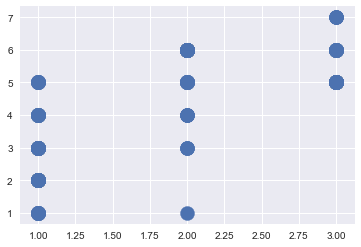

In [729]:
s=plt.scatter(training_data['Pclass']
               ,training_data['Cabin'],s=200 #the size of the dotts
             )



### we take from that that there is no one from class 1 lives in the level (6, 7) , no one from class 2 lives in (7),
### no one from class 3 lives in (1, 2, 3, 4, 5)  (poor people)#workers

In [505]:
pd.isnull(training_data).sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       469
dtype: int64

In [687]:
training_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C


In [688]:
training_data[training_data['Pclass']==3].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,NaN,S


In [690]:
print(len(training_data.Ticket.unique())) # haha , 681 unique numbers -_- #Cheesy

681


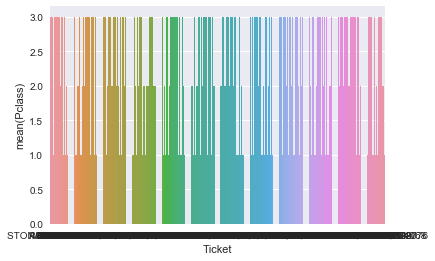

In [691]:
# i want the Pclass that got the same ticket to fill the nans 
sns.barplot(training_data['Ticket'],training_data['Pclass'])

### i should look for something that might classify the Tickets if i can

In [ ]:
# gotta do it later i guess 

In [510]:
# gotta implement the tf-idf for filling the nans 

#training_data.loc[training_data.loc['Name'][1]]
#training_data.loc[training_data['Sex']=='male','Sex']=1
#training_data.sort_values('Name')#['Name','Cabin','SibSp','Parch']
#(training_data['Ticket'].unique())#.sum()
#training_data

In [511]:
training_data[training_data['Pclass']==1].sort_values('Ticket').head() 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
257,1,1,"Cherry, Miss. Gladys",0,30.0,0,0,110152,86.50,2
504,1,1,"Maioni, Miss. Roberta",0,16.0,0,0,110152,86.50,2
759,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,110152,86.50,2
262,0,1,"Taussig, Mr. Emil",1,52.0,1,1,110413,79.65,5
558,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,110413,79.65,5


In [692]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,4,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,5,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,4,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


### is it just me or all the names are sorted by (Miss, Mr, Master, Rev ,Mrs,etc...

In [ ]:
# look for it later # you might do some dommies by it ! >.>
#                                                        _  
    
#seems like a way to classify in the Emergency ! 

### the median is better than the mean for ages btw. check 
https://stats.stackexchange.com/questions/2547/why-is-median-age-a-better-statistic-than-mean-age
### if you want to  know more 

### filling the nan on 'Age' for training and testing  data   (with median)

In [707]:
training_data['Age']=training_data['Age'].fillna(np.median(training_data[pd.notnull(training_data['Age'])]['Age']))
testing_data['Age']=testing_data['Age'].fillna(np.median(testing_data[pd.notnull(testing_data['Age'])]['Age']))

In [716]:
training_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C


In [512]:
training_data.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       422
dtype: int64

In [513]:
### unique=training_data.Cabin.unique()
for i in unique:
    print('Cabin',i)
    print(pd.notnull(training_data.loc[training_data['Cabin']==i,['Cabin']]).count())
x=1

Cabin nan
Cabin    0
dtype: int64
Cabin 3
Cabin    54
dtype: int64
Cabin 4
Cabin    41
dtype: int64
Cabin 5
Cabin    120
dtype: int64
Cabin 7
Cabin    4
dtype: int64
Cabin 2
Cabin    66
dtype: int64
Cabin 6
Cabin    108
dtype: int64
Cabin 1
Cabin    29
dtype: int64


In [515]:
#sns.countplot(training_data['Ticket'],hue=training_data['Cabin'])
special=training_data[training_data['Cabin']==1]
meh=special.Ticket.unique()
print(meh)


#sns.countplot(training_data['Ticket'],hue=training_data['Cabin'])
special=training_data[training_data['Cabin']==1]
meh=special.Ticket.unique()
special2=training_data[training_data['Cabin']==2]
meh2=special2.Ticket.unique()
print(meh2)
for i in meh:
    for x in meh2:
        if i==x:
            print('fail')
# the tickets are unique for every Cabin !
# the tickets AREN'T unique for every Pclass ! # i deleted the code 

['113788' '19947' 'PC 17754' '17764' '112277' '113798' 'PC 17596' '19988'
 '113784' '33638' '113786' '11771' '113787' '11755' '237789' '13049'
 '113804' '27042' '13214' '13213' '16988' '112379' '113501' 'PC 17600'
 '112050' '11774' '112053' '111369']
['113783' 'PC 17569' '113789' '113509' '113572' '110465' 'PC 17558'
 'PC 17593' '111240' '111428' '113514' 'PC 17585' '110152' 'PC 17755'
 '112059' '11967' 'PC 17608' '111361' 'PC 17477' '113760' '110564' '113794'
 '13509' '19952' '113792' '111427' '12749' '113050' '13568' 'WE/P 5735'
 '113807' '13567' '111426' '19996' 'F.C. 12750' '24160' '17474' '113800'
 '113028' '112058' '113055' 'PC 17590' '695']


In [563]:
'''#converting the ages from float to int 
for x in range(len(training_data)):
    a=training_data.loc[x,'Fare']
    if(pd.notnull(a)):
        training_data.loc[x,'Fare']=int(a)
    
training_data.head(7)'''
# this was kind of stupid too 
x=1

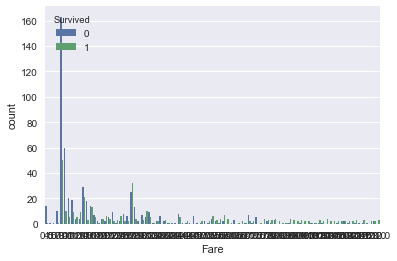

In [518]:
sns.countplot(training_data['Fare'],hue=training_data['Survived'])
#training_data['Fare'].unique()

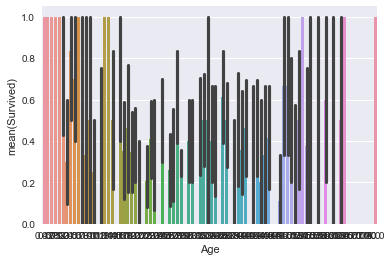

In [717]:
sns.barplot(training_data['Age'],training_data['Survived']==1) # survived !


# don't miss with the two next  plots bellow !!!!!

### the next plots are old (i divided the age for inrervals like (0,5,10,15,etc..)

In [718]:
# the code for making the 2 plots bellow 
# organizing the ages to a range that can be showed  # the difference is 5 now between every age 
'''for x in range(len(training_data)):
    a=training_data.loc[x,'Age']
    if(pd.notnull(a)):
        mod=a%10
        if(mod>2.5 and mod <7.5):
            a=a-mod
            a=a+5
        if (mod>=7.5):
            a=a-mod
            a=a+10
        if(mod<=2.5):
            a=a-mod
        training_data.loc[x,'Age']=a'''

#well, that was stupid ! 
x=1   

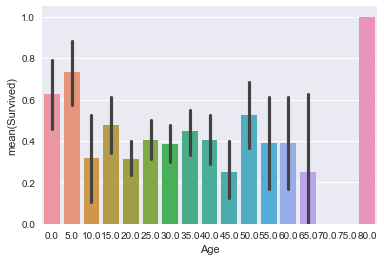

In [519]:
sns.barplot(training_data['Age'],training_data['Survived']==1) # survived !


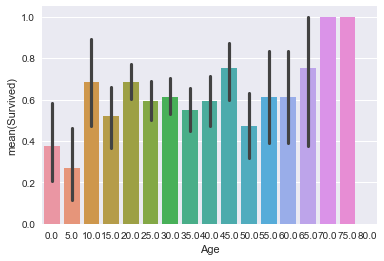

In [520]:
sns.barplot(training_data['Age'],training_data['Survived']==0) # dead people ! 

In [730]:

print((training_data[training_data['SibSp']==0]['Age']).count())
print((training_data[training_data['SibSp']==1]['Age']).count())
print((training_data[training_data['SibSp']==2]['Age']).count())
print((training_data[training_data['SibSp']==3]['Age']).count())
print((training_data[training_data['SibSp']==4]['Age']).count())


608
209
28
16
18


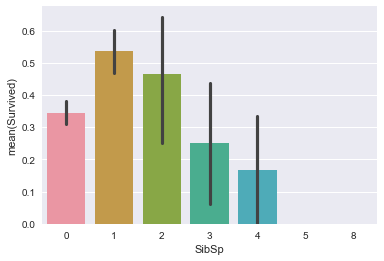

In [731]:
sns.barplot(training_data['SibSp'],training_data['Survived'])

### the people with 1 sibiling have survived the most, then 2, etc..

In [523]:
#the max age is 80 
#the min age is 0.42 # that means half a year 

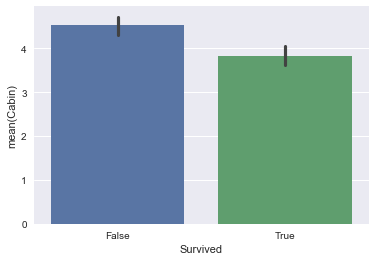

In [524]:
sns.barplot(training_data['Survived']==1,training_data['Cabin'])

In [526]:
training_data.sort_values('Fare').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
822,0,1,"Reuchlin, Jonkheer. John George",1,40.0,0,0,19972,0.0,NaN
179,0,3,"Leonard, Mr. Lionel",1,35.0,0,0,LINE,0.0,NaN
466,0,2,"Campbell, Mr. William",1,NaN,0,0,239853,0.0,NaN
263,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.0,2
806,0,1,"Andrews, Mr. Thomas Jr",1,40.0,0,0,112050,0.0,1


In [527]:
print('survived : ', training_data.Survived.unique())
print('Sex : ',training_data.Sex.unique())  # 1 for male , 0 for female 
print('Pclass : ',training_data.Pclass.unique())#Ticket class
print('SibSp :',training_data.SibSp.unique())# of siblings / spouses aboard the Titanic
#print('Embarked : ',training_data.Embarked.unique()) # Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
print('Parch : ',training_data.Parch.unique())# of parents / children aboard the Titanic
training_data['Fare']=training_data['Fare']/100

#print(training_data.Cabin.unique()) # the cabin number 
#print(training_data['Fare']) # the ticket cost 

survived :  [0 1]
Sex :  [1 0]
Pclass :  [3 1 2]
SibSp : [1 0 3 4 2 5 8]
Parch :  [0 1 2 5 3 4 6]


In [528]:
print(training_data['Fare'].mean())
print(training_data['Fare'].max())
print(training_data['Fare'].min())
cutted=training_data.loc[training_data['Fare']>0]
cutted=cutted.loc[training_data['Fare']<2]
print(cutted['Fare'].mean())
cutted.sort_values('Fare').head()
#cutted=training_data[training_data['Fare']<5]

0.31785634118967326
5.12
0.0
0.2656775700934568


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
378,0,3,"Betros, Mr. Tannous",1,20.0,0,0,2648,0.04,NaN
872,0,1,"Carlsson, Mr. Frans Olof",1,35.0,0,0,695,0.05,2
371,0,3,"Wiklund, Mr. Jakob Alfred",1,20.0,1,0,3101267,0.06,NaN
804,1,3,"Hedman, Mr. Oskar Arvid",1,25.0,0,0,347089,0.06,NaN
411,0,3,"Hart, Mr. Henry",1,NaN,0,0,394140,0.06,NaN


In [529]:
#plt.scatter(training_data['Pclass'],training_data['Fare'])
print(training_data['Fare'].max())
print(training_data['Fare'].min())
#print(training_data['Fare']/training_data['Fare'].sum())
print(training_data['Fare'].mean())
training_data.sort_values('Fare')
#x=training_data.loc[training_data['Fare']>500]
x=(training_data.loc[training_data['Fare']>500])
t=((training_data.loc[training_data['Fare']>200]))# & 
vv=((training_data.loc[training_data['Fare']<500]))#,3#,(500>training_data['Fare']>200),3]

5.12
0.0
0.31785634118967326


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [530]:
# looking for survivers vs not survivers 
#training_data.Sex.plot('hist') # about 1/3 the ship were females and the others were males 
#training_data.Survived.plot('hist') # about 1/3 survived and the others died 
(training_data['Pclass']==2).sum() #184
(training_data['Pclass']==1).sum() #216
(training_data['Pclass']==3 ).sum()/491 #491
s=((training_data.loc[training_data['Pclass']==3,'Survived']))#.sum()
s.sum()

119

In [531]:
#plt.bar(training_data['Survived'],training_data['Cabin'])

#with sns.axes_style('white'):
#    sns.factorplot('year',data=training_data,aspect=2, # how should it be displayed 
 #                  kind='count',color='steelblue') 
    # plotting factor plot in seaborn  # plotting histogram in seaborn 
pd.isnull(training_data['Cabin']).sum()#687
whatever=training_data[pd.notnull(training_data['Cabin'])]#204
whatever.sort_values('Fare').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
815,0,1,"Fry, Mr. Richard",1,NaN,0,0,112058,0.00,2
263,0,1,"Harrison, Mr. William",1,40.0,0,0,112059,0.00,2
806,0,1,"Andrews, Mr. Thomas Jr",1,40.0,0,0,112050,0.00,1
872,0,1,"Carlsson, Mr. Frans Olof",1,35.0,0,0,695,0.05,2
260,0,3,"Smith, Mr. Thomas",1,NaN,0,0,384461,0.07,6


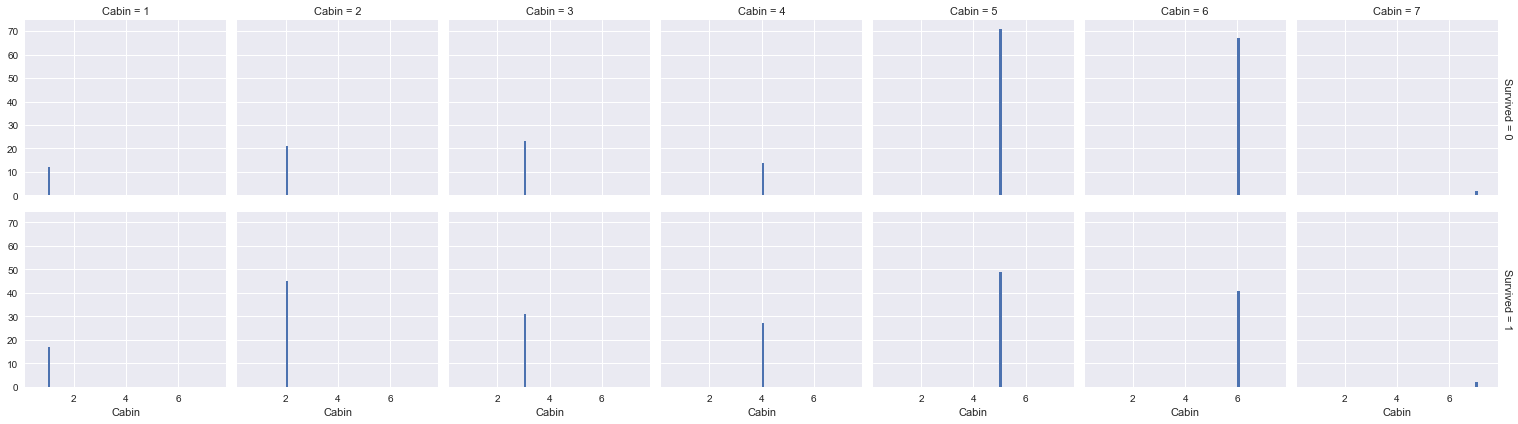

In [740]:
grid =sns.FacetGrid(training_data,row='Survived',col='Cabin',margin_titles=True) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Cabin')

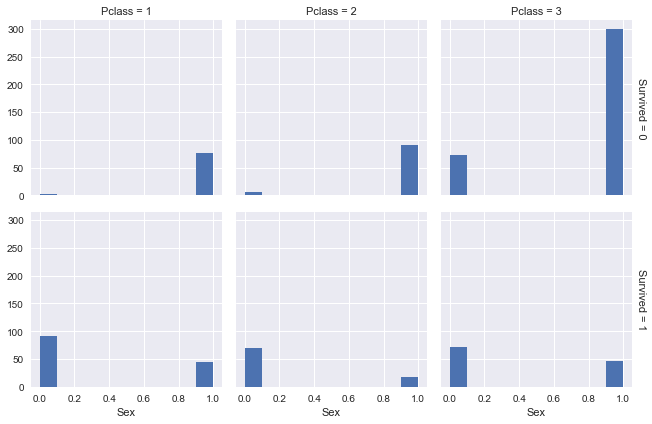

In [533]:
grid =sns.FacetGrid(training_data,row='Survived',col='Pclass',margin_titles=True) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Sex')

In [534]:
#training_data.info()
 # the info is saying that we have "NAN" values on --> (Age,Cabin)
    
#print(pd.isnull(training_data['Cabin']).sum())
#print(pd.isnull(training_data['Age']).sum())
# 687 , 177

s=training_data[(pd.isnull(training_data.Cabin)) & (pd.isnull(training_data.Age))] # what is nan on both of them 
print(s.count()) # 106 values have nans on age and Cabin on the training data

#pd.isnull(training_data['Cabin']) # works :D 
#pd.isnull(np.nan) # works perfectally ! ! ! 
training_data['Pclass'].unique()

Survived    106
Pclass      106
Name        106
Sex         106
Age           0
SibSp       106
Parch       106
Ticket      106
Fare        106
Cabin         0
dtype: int64


array([3, 1, 2], dtype=int64)

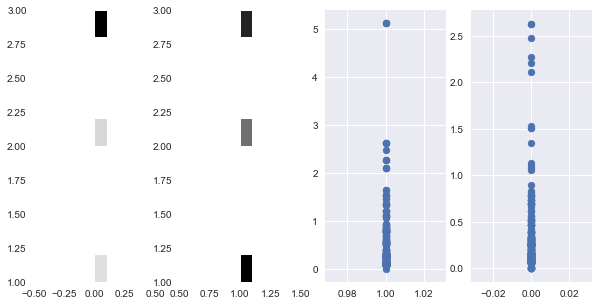

In [535]:
survive=training_data[training_data['Survived']==1]
died=training_data[training_data['Survived']==0]

fig,ax=plt.subplots(1,4,figsize=(10,5))
ax[1].hist2d(x=survive['Survived'],y=survive['Pclass'])
ax[0].hist2d(x=died['Survived'],y=died['Pclass'])

ax[2].scatter(survive['Survived'],survive['Fare'])
ax[3].scatter(died['Survived'],died['Fare'])

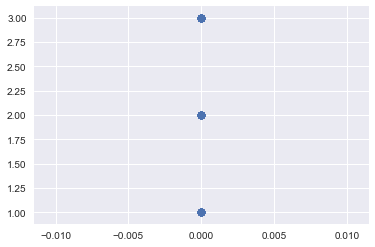

In [536]:
plt.scatter(died['Survived'],died['Pclass'])

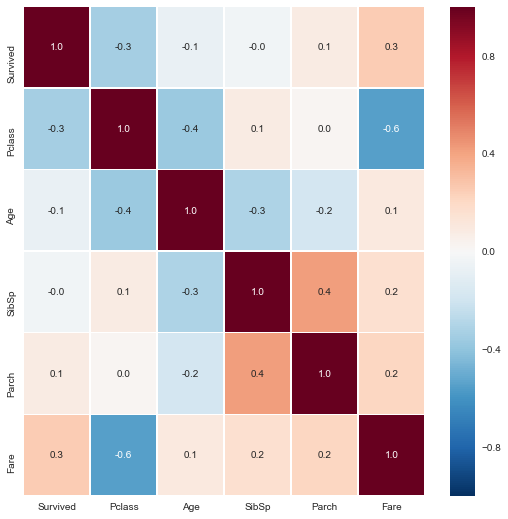

In [537]:
a,ax=plt.subplots(figsize=(9,9))
sns.heatmap(training_data.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
#there is correlation between survived and (Pclass,Fare)

### age : the max age is 76.0 # the min age is 0.17

### the only difference between the training and the testing data that the "Survived" column 

In [538]:
survived=training_data.loc[training_data.Survived==1]
survived.count()

Survived    342
Pclass      342
Name        342
Sex         342
Age         290
SibSp       342
Parch       342
Ticket      342
Fare        342
Cabin       212
dtype: int64

In [539]:
died=training_data.loc[training_data.Survived==0]
died.count()

Survived    549
Pclass      549
Name        549
Sex         549
Age         424
SibSp       549
Parch       549
Ticket      549
Fare        549
Cabin       210
dtype: int64

In [540]:
training_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,"Braund, Mr. Owen Harris",1,20.0,1,0,A/5 21171,0.07,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,40.0,1,0,PC 17599,0.71,3
2,1,3,"Heikkinen, Miss. Laina",0,25.0,0,0,STON/O2. 3101282,0.07,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.53,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.08,5


In [541]:
# print the unique values for the columns 'Pclass' , 'Age','Pcarch','Ticket'
for a,b in enumerate(training_data.columns):
    if(a==1 or a==4 or  a==6 or a==7):
         print(b, training_data[b].unique()) 
    else:
        pass    

Pclass [3 1 2]
Age [ 20.  40.  25.  35.  nan  55.   0.  15.   5.  60.  30.  10.  65.  50.  45.
  70.  80.  75.]
Parch [0 1 2 5 3 4 6]
Ticket ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151' '347082'
 '350406' '248706' '382652' '244373' '345763' '2649' '239865' '248698'
 '330923' '113788' '347077' '2631' '19950' '330959' '349216' 'PC 17601'
 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789' '2677' 'A./5. 2152'
 '345764' '2651' '7546' '11668' '349253' 'SC/Paris 2123' '330958'
 'S.C./A.4. 23567' '370371' '14311' '2662' '349237' '3101295' 'A/4. 39886'
 'PC 17572' '2926' '113509' '19947' 'C.A. 31026' '2697' 'C.A. 34651'
 'CA 2144' '2669' '113572' '36973' '347088' 'PC 17605' '2661' 'C.A. 29395'
 'S.P. 3464' '3101281' '315151' 'C.A. 33111' 'S.O.C. 14879' '2680' '1601'
 '348123' '349208' '374746' '248738' '364516' '345767' '345779' '330932'
 '113059' 'SO/C 14885' '3101278' 'W./C. 6608' 'SOTON/OQ 392086' 

## information about the data :

## Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### make all the features but survived as x_train/x_test and the survived as y_train to predict the y_test
### lets try with a small chunk of the data

In [542]:
# trying to predict something lol 

logistic =LogisticRegression()

trying=training_data.copy()

### from here i have two choices to make(for training classifier) :
### 1- drop the columns that have nans ,2- drop all nans, 

### 1-drop the columns that have nans

In [543]:

#training_x : anything but Survived 
#training_y : Survived

training_y =trying.copy()
del training_y['Cabin'],training_y['Fare'],training_y['Ticket'],training_y['Parch'],training_y['SibSp'],training_y['Sex'],training_y['Age'],training_y['Name'],training_y['Pclass']

training_x=trying.copy()
del training_x['Survived'],training_x['Ticket'],training_x['Name'],training_x['Cabin'],training_x['Age']


logistic.fit(training_x,training_y.values.ravel())


training_y.head(3)  # just the index and the survived column 
training_x.head(3) # the columns here are : 'Pclass','Sex','SibSp','Parch','Fare'


,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,0.07
1,1,0,1,0,0.71
2,3,0,0,0,0.07


In [544]:
training_x.head()

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,0.07
1,1,0,1,0,0.71
2,3,0,0,0,0.07
3,1,0,1,0,0.53
4,3,1,0,0,0.08


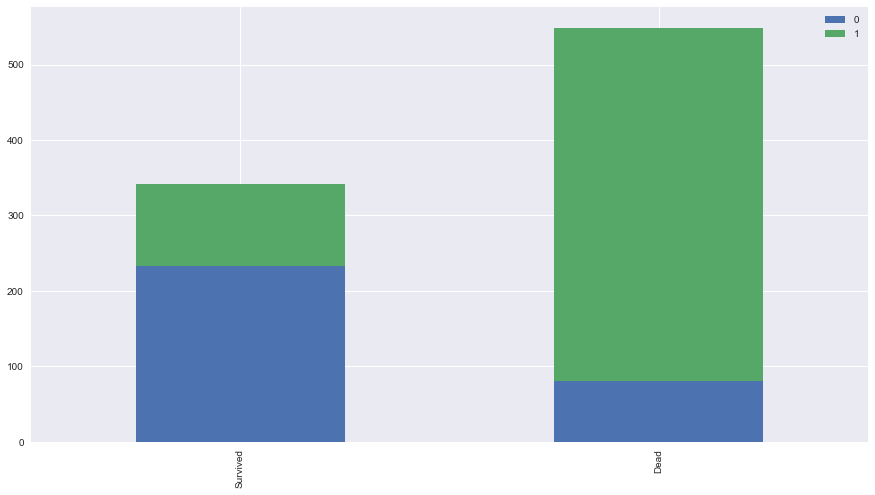

In [561]:

survived_sex = training_data[training_data['Survived']==1]['Sex'].value_counts()
dead_sex = training_data[training_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))

In [545]:
testing_x=testing_data.copy()
#testing_x.info() # there is 327 nans in the 'Cabin' ||  86 nans in the 'Age'  
#(pd.isnull(testing_x)).sum()


In [546]:
del testing_x['Ticket'],testing_x['Name'],testing_x['Cabin'],testing_x['Age'],testing_x['index'],testing_x['Embarked'],testing_x['PassengerId']

In [547]:
testing_x.head(2)

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,0,0,7.8292
1,3,0,1,0,7.0000


In [548]:
training_x.head(2)

,Pclass,Sex,SibSp,Parch,Fare
0,3,1,1,0,0.07
1,1,0,1,0,0.71


### so from here i should make testing_x from the testing_data and try to predict the survived as testing_y

In [549]:
testing_y=logistic.predict(testing_x)

In [550]:
testing_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1,

In [134]:
trying.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,0,3,"Braund, Mr. Owen Harris",1,20.0,1,0,A/5 21171,0.07,NaN
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,40.0,1,0,PC 17599,0.71,3
2,1,3,"Heikkinen, Miss. Laina",0,25.0,0,0,STON/O2. 3101282,0.07,NaN
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,0.53,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,0.08,5


In [135]:
ss=training_data[training_data['Fare']<10]
ss=ss[ss['Fare']>0]
ss.Cabin.unique()
ss.Pclass.unique()
training_data.count() # 891

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       422
dtype: int64